# Ecuación de estado Master (Caso newtoniano isótropo)

Resolveremos el sistema de ecuaciones de estructura estelar asumiendo una relación $P=P(\rho)$ un poco más realista. Para determinar las incógnitas $P(r)$, $\rho(r)$ y $m(r)$ de la ecuación de equilibrio hidrostático 

\begin{equation}
\frac{\mathrm{d}P(r)}{\mathrm{d}r}=-\frac{Gm(r)}{r^2}\rho(r)
\end{equation}

### Ecuaciones de estado:   $P = \kappa \rho^{1 + \frac1n} + \alpha \rho -\beta $


###  Master Lane-Emden:
\begin{equation}
\frac{1}{\xi^2}\frac{\mathrm{d}}{\mathrm{d}\xi} \left[ \xi^2 \left(1+ \frac{b}{\Psi}  \right) \frac{\mathrm{d} \Psi}{\mathrm{d}\xi}\right]  + \Psi^{n} =0
\end{equation}

Y la presión vendrá dada por
\begin{equation}
\frac{\mathcal{P}}{\mathcal{P}_c}= \frac{\Psi^{n} \left[\Psi^{1+\frac1n}  +\left(1+\frac1n\right)  b  \right] -\Psi_1^{n} \left[\Psi_1^{1+\frac1n}  +\left(1+\frac1n\right) b  \right] }{ 1  +\left(1+\frac1n\right)   b   -\Psi_1^{n} \left[\Psi_1^{1+\frac1n}  +\left(1+\frac1n\right)  b  \right] } 
\end{equation}

donde $\Psi_1=\Psi(\xi_1)$, define la superficie de la estrella. 


In [1]:
# -*- coding: utf-8 -*-
from matplotlib.pyplot import *
from numpy import *
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
style.use('classic')

#colores=['blue','red','brown','purple','black','olive']
#dasheses=[[],[5,2],[5,5],[5,2,2,2],[2,2],[]]
    
def dtheta(theta, x, n):
        return(theta[1], -(theta[0])**(n+1)/(b + theta[0]) +  (theta[1]*(b*x*theta[1]-2*theta[0]*(b+theta[0])))/(x*theta[0]*(b+theta[0])))

               
b = 1.0
N = 100000
R = 1.0
theta0 = [1.0, 0.0]
x = linspace(1.0e-30, R, N)
enes = [0.5,1.0,1.5,2.0,3.0,5.0,8.0]
Thetas = []

for i in range(len(enes)):
	sol = odeint(dtheta, theta0, x, args=(enes[i],))
	Thetas.append(sol[:,0])  


/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


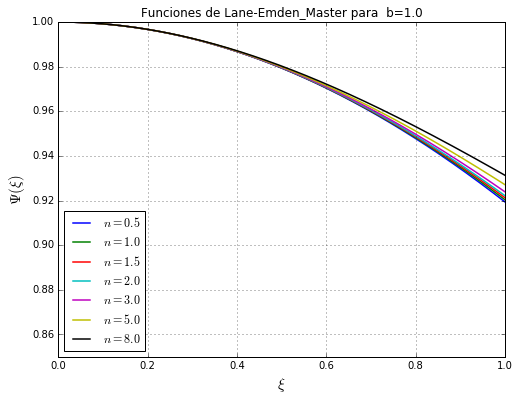

In [2]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Thetas[i])], Thetas[i], label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Funciones de Lane-Emden_Master para  b=1.0')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$\Psi(\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0.85,1)
axes.grid()
fig.savefig('/Volumes/HOME/Trabajo/Work/MasterNewton/Texto/Figuras/Gamma_nb1.pdf')
fig.show()

In [3]:
Psi = sol[:,0]
    
Pes = []   
for i in range(len(enes)):
    T1 = (Psi[-1])**enes[i]*( (Psi[-1]) +(1+1/enes[i])*b) 
    T = Psi**enes[i]*(Psi + (1+1/enes[i])*b )
    P = (T-T1)/(1+(1+1/enes[i])*b - T1)   
    Pes.append(P)
    
print (Pes[i])
print (Psi)

[1.00000000e+00 1.00000000e+00 9.99999999e-01 ... 2.50244067e-05
 1.25121672e-05 0.00000000e+00]
[1.         1.         1.         ... 0.93135175 0.93135061 0.93134947]


/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


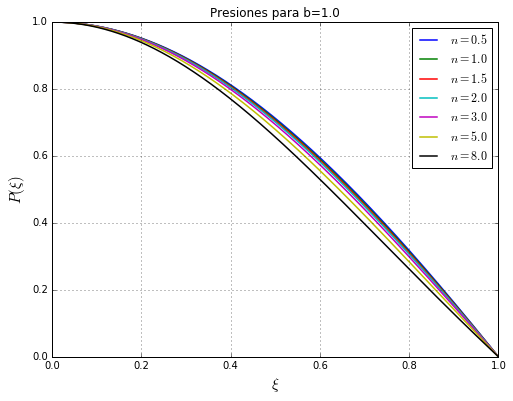

In [4]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(enes)):
	axes.plot(x[:len(Pes[i])], Pes[i],  label='$n = %1.1f$'%enes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Presiones para b=1.0')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$P (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0,1)
axes.grid()
fig.savefig('/Volumes/HOME/Trabajo/Work/MasterNewton/Texto/Figuras/Presiones_nb1.pdf')
fig.show()
# colores[i], dashes=dasheses[i],

## Solución exacta

### Caso $n=0$: 

La única solución analítica que podemos encontrar equivale al límite en que el índice adiabático $\gamma \rightarrow \infty$
\begin{equation}
P=\kappa \rho^\gamma +\alpha \rho -\beta 
\end{equation}

La ecuación Lane-Emden Master es
\begin{equation}
\frac{1}{\xi^2}\frac{\mathrm{d}}{\mathrm{d}\xi} \left[\xi^2 \left(1+ \frac{b}{\Psi}  \right) \frac{\mathrm{d} \Psi}{\mathrm{d}\xi}\right] =-1
\end{equation}

cuya solución analítica resulta ser

\begin{equation}
\Psi_0= {\bf W} \left(\frac {{\rm e}^{ - \Theta }}{b}\right) b 
\end{equation}
con
\begin{equation}
\Theta=\frac {{\xi}^{2}-6 }{6 b}
\end{equation}

In [5]:
# La solucion analitica 
from scipy.special import lambertw
bes = [0.1,0.5,1.0,2.0,5.0,8.0]
Ps0 = []

for i in range(len(bes)):
        t = x**2/(6*bes[i])-1/bes[i]
        Psi0=lambertw(exp(-t)/bes[i])*bes[i]
        Ps0.append(Psi0)


/Users/hector/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


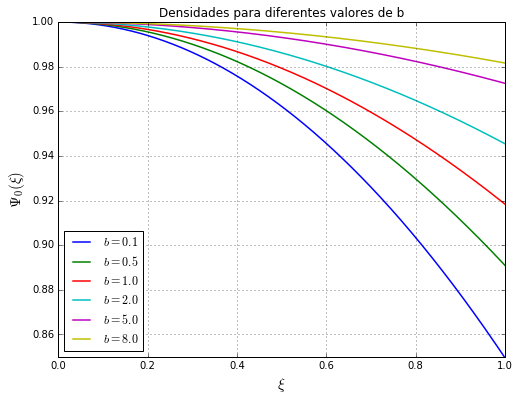

In [6]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(bes)):
	axes.plot(x[:len(Ps0[i])], Ps0[i],  label='$b = %1.1f$'%bes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Densidades para diferentes valores de b')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$\Psi_0 (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0.85,1)
axes.grid()
fig.savefig('/Volumes/HOME/Trabajo/Work/MasterNewton/Texto/Figuras/Gamma0Den.pdf')
fig.show()

In [7]:
PsiR = Ps0[i]

Pres0 = []   
for i in range(len(bes)):
    ra1 = sqrt( (1+bes[i])**2 - bes[i]/3*x**2 )
    ra2 = sqrt( (1+bes[i])**2 - bes[i]/3*(R)**2 )
    TN = -(x**2)/2-1/bes[i]*(ra1)**(3) + 1/bes[i]*(1+bes[i])**3
    TD = -((R)**2)/2-1/bes[i]*(ra2)**(3) + 1/bes[i]*(1+bes[i])**3
    Pr0 = 1 - TN/TD  
    Pres0.append(Pr0)

/Users/hector/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


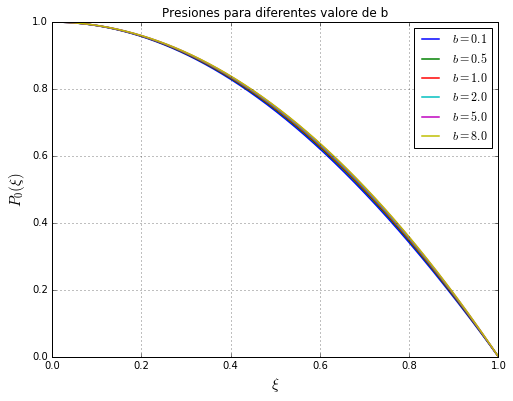

In [8]:
fig, axes = plt.subplots(figsize=(8,6))
for i in range(len(bes)):
	axes.plot(x[:len(Pres0[i])], Pres0[i],  label='$b = %1.1f$'%bes[i], linewidth=1.50)
axes.legend(loc='best')
axes.set_title(u'Presiones para diferentes valore de b')
axes.set_xlabel('$\\xi$', fontsize=15)
axes.set_ylabel('$P_0 (\\xi)$', fontsize=15)
axes.set_xlim(0,R)
axes.set_ylim(0,1)
axes.grid()
fig.savefig('Lane-EmdenPr0.pdf')
fig.show()